In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

In [2]:
n = int(input("Enter Number of Arms:")) # number of arms
N = int(input("Enter Number of Iterations:")) # number of simulations
epsilon = float(input("Enter Value of Epsilon:")) # freq to explore/exploit
reward = np.zeros(n, dtype = "float32")
print("Enter Values of Rewards:")
for i in range(n):
    reward[i] = float(input())

print(f"Input of Rewards: {reward}")

Enter Number of Arms: 3
Enter Number of Iterations: 100000
Enter Value of Epsilon: 0.1


Enter Values of Rewards:


 1.2
 5.5
 3.8


Input of Rewards: [1.2 5.5 3.8]


In [3]:
# Define Action class 
class Actions: 
    def __init__(self, m): 
        self.m = m # reward for arm
        self.mean = 0 # average reward for arm 
        self.N = 0 #Number of Simulations
  
  # Choose a random action 
    def choose(self):  
        return np.random.randn() + self.m  #adding a random number to reward to add noise
  
  # Update the action-value estimate 
    def update(self, x): 
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x 
  
    def run_experiment(rewards, eps, N): 
        actions = []
        for i in range(len(rewards)):
            actions.append(Actions(rewards[i]))
        data = np.empty(N) 
    
        for i in range(N): 
            # epsilon greedy 
            p = np.random.random() 
            if p < eps: 
                j = np.random.choice(3) 
            else: 
                j = np.argmax([a.mean for a in actions]) 
        
            x = actions[j].choose() 
            actions[j].update(x) 

            # for the plot 
            data[i] = x 
        cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 

        for a in actions: 
            print(a.mean)
        return cumulative_average
    
    def plotResult(cum_avg,rewards,N):
        # plot moving average ctr 
        plt.plot(cum_avg) 
        for i in range(len(rewards)):
            plt.plot(np.ones(N)*rewards[i]) 
            plt.xscale('log')
            plt.xlim(1,N)
            plt.ylim(0,6)
        plt.show()         

1.1949831695669193
5.501398740570442
3.784383565116412


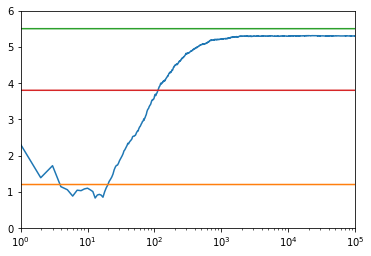

In [4]:
c_1 = Actions.run_experiment(reward, epsilon, N)
Actions.plotResult(c_1,reward,N)

In [29]:
def testEpsilon(reward,N):
    labels = [] 
    for i in range(1,10,2):
        labels.append(i/10)
        c_1 = Actions.run_experiment(reward,i/10, N)
        plt.plot(c_1)
        plt.xscale('log')
        plt.xlim(1,N)
        plt.ylim(0,6)
        plt.legend(labels,loc="best")
    plt.show()

1.1962650993916997
5.500625971206195
3.824740694627548
1.2001656146838917
5.498223927972823
3.8073395285637264
1.207606808380449
5.509064361157134
3.7991167807220267
1.1914623743514539
5.498308402585362
3.799213447130449
1.1985243502624223
5.498542668063775
3.8021453850835933


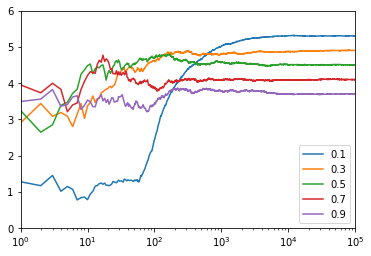

In [30]:
testEpsilon(reward,100000)